In [48]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("c:\\Users\\pedro\\OneDrive\\Área de Trabalho\\Spatial_Ovary")
dir = os.getcwd()

adata = sc.read_visium(dir + "\\data\\10x1", count_file= "feature_bc_matrix.h5")
# adata.var_names_make_unique()
# pos = sc.read_csv(dir + "\\data\\10x1\\spatial\\tissue_positions_list.csv")

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [49]:
adata.uns

OrderedDict([('spatial',
              {'5k_human_ovarian_tumor_CNIK_5pv2': {'images': {'hires': array([[[1.        , 1.        , 1.        ],
                         [1.        , 1.        , 1.        ],
                         [1.        , 1.        , 1.        ],
                         ...,
                         [1.        , 1.        , 1.        ],
                         [1.        , 1.        , 1.        ],
                         [0.99607843, 0.99607843, 0.99607843]],
                 
                        [[1.        , 1.        , 1.        ],
                         [1.        , 1.        , 1.        ],
                         [1.        , 1.        , 1.        ],
                         ...,
                         [0.99215686, 1.        , 0.99607843],
                         [0.99215686, 1.        , 0.99607843],
                         [0.99215686, 0.99607843, 0.9882353 ]],
                 
                        [[1.        , 1.        , 1.        ],
   

In [50]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [51]:
adata

AnnData object with n_obs × n_vars = 6842 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [52]:
import pandas as pd
mit = pd.DataFrame(adata.var)
mit.loc[mit["mt"]==True]

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,True,5189,12.888337,2.631049,24.159602,88182.0,11.387170
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,True,4916,8.486115,2.249829,28.149664,58062.0,10.969284
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,True,6602,53.877083,4.005096,3.507746,368627.0,12.817543
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,True,6184,36.502193,3.624399,9.617071,249748.0,12.428212
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,True,4295,6.707249,2.042161,37.225957,45891.0,10.734046
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,True,5761,22.498392,3.156932,15.799474,153934.0,11.944285
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,True,6355,41.036247,3.738532,7.117802,280770.0,12.545295
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,True,5682,21.387167,3.108488,16.954107,146331.0,11.893633
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,5548,13.647471,2.684268,18.912599,93376.0,11.444401
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,4605,7.050716,2.085761,32.695118,48241.0,10.783985


C:\Users\pedro\AppData\Local\Temp\ipykernel_19260\1125004840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
C:\Users\pedro\AppData\Local\Temp\ipykernel_19260\1125004840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_coun

<Axes: xlabel='n_genes_by_counts'>

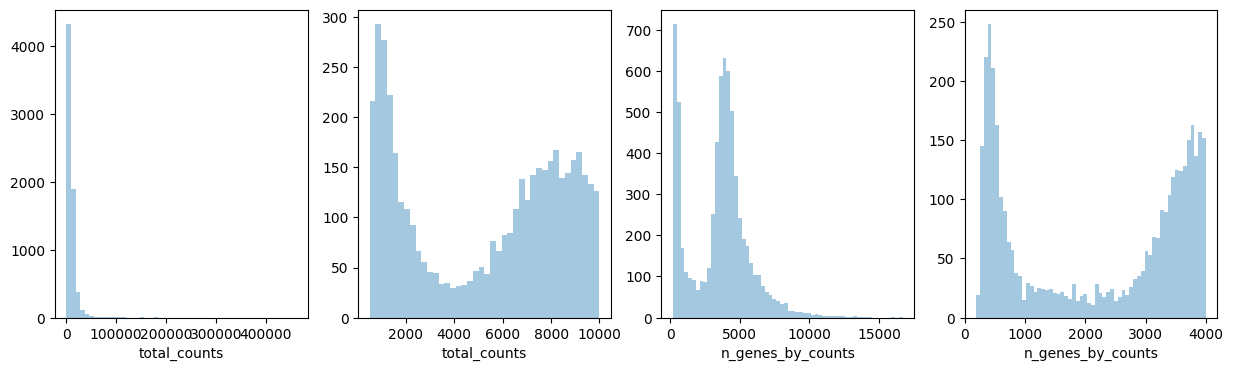

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [54]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


#cells after MT filter: 4708


c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


C:\Users\pedro\AppData\Local\Temp\ipykernel_19260\1125004840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
C:\Users\pedro\AppData\Local\Temp\ipykernel_19260\1125004840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_coun

<Axes: xlabel='n_genes_by_counts'>

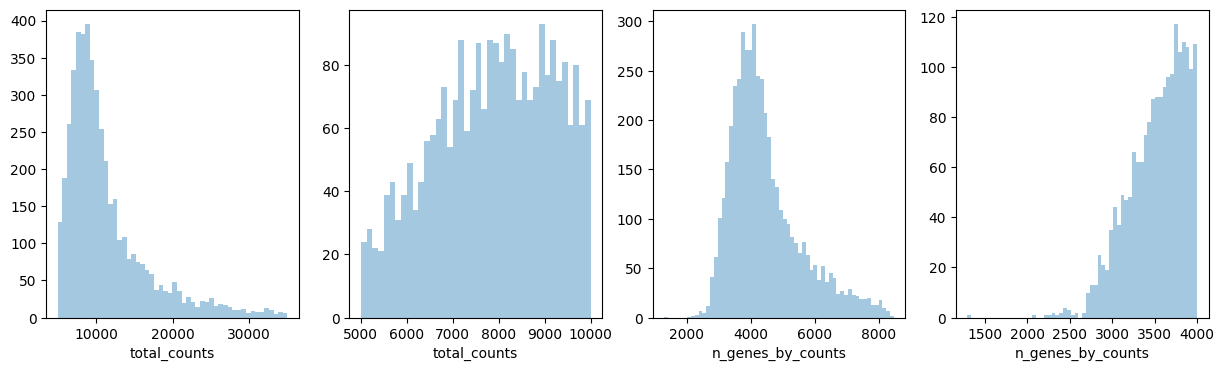

In [55]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [56]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [57]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


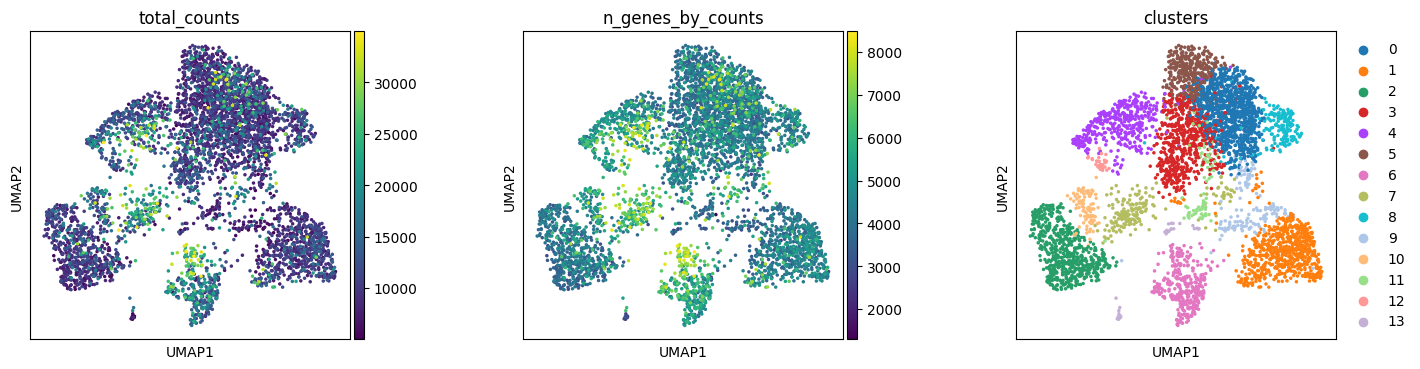

In [58]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

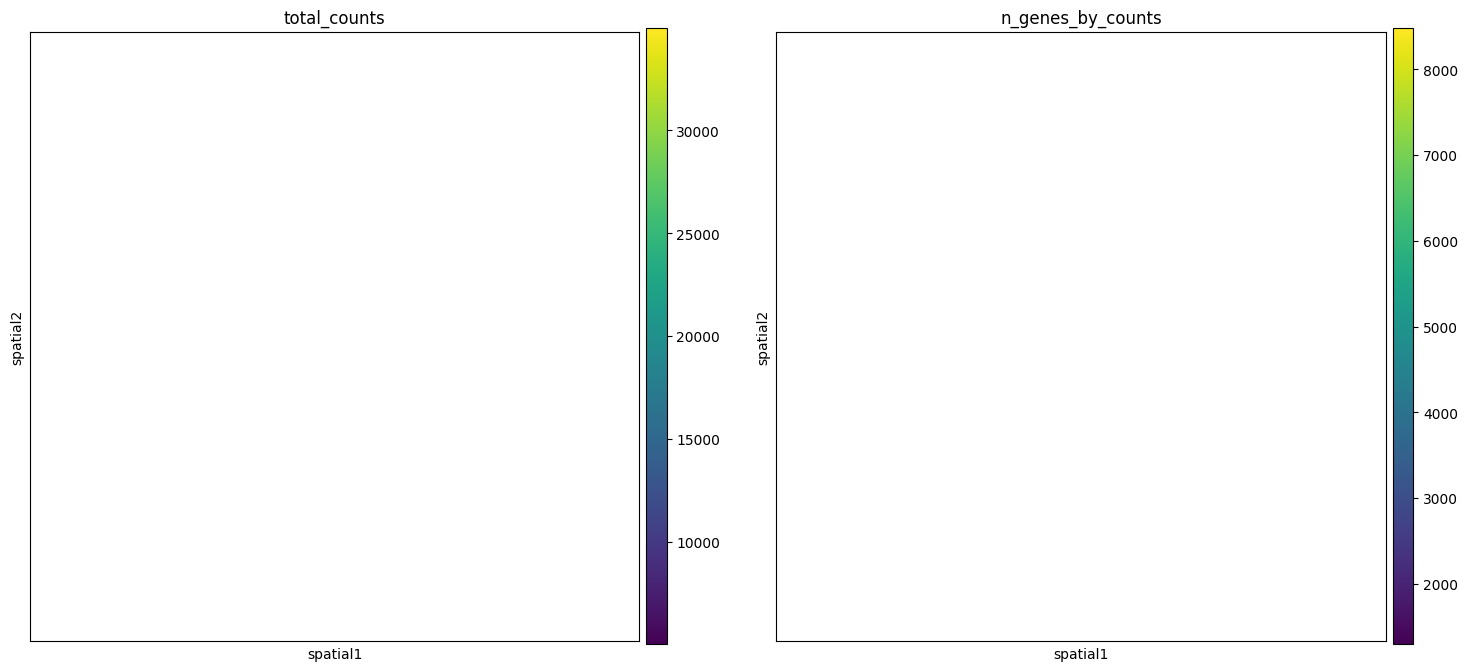

In [59]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])